<a href="https://colab.research.google.com/github/sira4154/anime_recommendation/blob/main/anime_recommendation_system_collaborative_fiter_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collaborative Filtering

## Introduction

Introduction Recommendation systems are a collection of algorithms used to recommend items to users based on information taken from the user. These systems have become ubiquitous can be commonly seen in online stores, movies databases and job finders. In this notebook, we will explore recommendation systems based on Collaborative Filtering and implement simple version of one using Python and the Pandas library.

In this notebook was created for review recommendation system collaborative filltering that I lerned from IBM data science from coursera.

## Data

In this notebook we will use the data from kaggle [Anime Recommendation Database 2020](https://https://www.kaggle.com/hernan4444/anime-recommendation-database-2020?select=anime.csv) that contain :
- The anime list per user. Include dropped, complete, plan to watch, currently watching and on hold.
- Ratings given by users to the animes that they has watched completely.
- Information about the anime like genre, stats, studio, etc.
- HTML with anime information to do data scrapping. These files contain information such as reviews, synopsis, information about the staff, anime statistics, genre, etc.

This project we will use only 2 dataset anime.csv and rating_complete.csv for generate recommendation system model.


### Import Library

In [ ]:
#Dataframe manipulation library
import sys
import pandas as pd
#Math functions, we'll only need the sqrt function so let's import only that
from math import sqrt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install openpyxl

### Data Preprocessing

import animelist and rating dataset

In [ ]:
animecsv = pd.read_csv("../input/anime-recommendation-database-2020/anime.csv")
ratingcsv = pd.read_csv("../input/anime-recommendation-database-2020/rating_complete.csv")

In [ ]:
animecsv.shape

(17562, 35)

Show the data from animeCSV

In [ ]:
animecsv.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


Due to there are many data in anime dataset so we need to fillter the data for make it faster to compute this coding.

In [ ]:
#Remove Unknown in score column and select only tv type 
anime_movie = animecsv[(animecsv["Score"] != "Unknown") & (animecsv["Type"] == "TV") ] 
anime_movie = anime_movie[anime_movie["Popularity"] <= 5000]
anime_movie.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
5,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",Unknown,アイシールド21,TV,145,"Apr 6, 2005 to Mar 19, 2008",Spring 2005,...,9226.0,14904.0,22811.0,16734.0,6206.0,2621.0,795.0,336.0,140.0,151.0


In [ ]:
anime_movie.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

In [ ]:
anime_movie.shape

(2530, 35)

In [ ]:
anime_movie_fillter = anime_movie[["MAL_ID","Name","Premiered","Popularity"]]
anime_movie_fillter.head()

,MAL_ID,Name,Premiered,Popularity
0,1,Cowboy Bebop,Spring 1998,39
2,6,Trigun,Spring 1998,201
3,7,Witch Hunter Robin,Summer 2002,1467
4,8,Bouken Ou Beet,Fall 2004,4369
5,15,Eyeshield 21,Spring 2005,1003


In [ ]:
anime_movie_fillter['year'] = anime_movie_fillter.Premiered.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
anime_movie_fillter['year'] = anime_movie_fillter.Premiered.str.extract('(\d\d\d\d)',expand=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
anime_movie_fillter = anime_movie_fillter.rename(columns={'MAL_ID': 'anime_id'})

In [ ]:
anime_movie_fillter.head()

,anime_id,Name,Premiered,Popularity,year
0,1,Cowboy Bebop,Spring 1998,39,1998
2,6,Trigun,Spring 1998,201,1998
3,7,Witch Hunter Robin,Summer 2002,1467,2002
4,8,Bouken Ou Beet,Fall 2004,4369,2004
5,15,Eyeshield 21,Spring 2005,1003,2005


In [ ]:
anime_movie_fillter.describe()

,anime_id,Popularity
count,2530.000000,2530.000000
mean,17985.097233,1969.071937
std,15036.199196,1409.100569
min,1.000000,1.000000
25%,2052.000000,742.250000
50%,15470.000000,1686.500000
75%,33388.250000,3077.000000
max,46118.000000,5000.000000


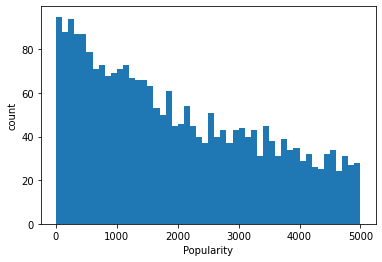

In [ ]:
# Compute number of data points: n_data
n_data = len(anime_movie_fillter["Popularity"])

# Number of bins is the square root of number of data points: n_bins
n_bins =  np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
plt.hist(anime_movie_fillter["Popularity"],bins = n_bins)

# Label axes
_ = plt.xlabel('Popularity')
_ = plt.ylabel('count')

# Show histogram
plt.show()

In [ ]:
#anime_movie_fillter = anime_movie_fillter[anime_movie_fillter["Popularity"] <= 5000]

In [ ]:
anime_movie_fillter.shape

(2530, 5)

# RatingCSV 

In [ ]:
ratingcsv.head()

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9


# Collaborative Filtering

In [ ]:
userInput = [
            {'Name':'Sword Art Online','rating':7},
            {'Name':'Boku no Hero Academia', 'rating': 8},
            {'Name':'Naruto', 'rating':9},
            {'Name':"One Punch Man", 'rating':6},
            {'Name':'Major S6', 'rating':9}
         ] 
inputAnime = pd.DataFrame(userInput)
inputAnime

,Name,rating
0,Sword Art Online,7
1,Boku no Hero Academia,8
2,Naruto,9
3,One Punch Man,6
4,Major S6,9


## Add anime_id to input user

In [ ]:
#Filtering out the animes by title
inputId = anime_movie_fillter[anime_movie_fillter['Name'].isin(inputAnime['Name'].tolist())]
#Then merging it so we can get the anime_id. It's implicitly merging it by title.
inputAnime = pd.merge(inputId, inputAnime)
#Dropping information we won't use from the input dataframe
#Final input dataframe
#If a anime you added in above isn't here, then it might not be in the original 
#dataframe or it might spelled differently, please check capitalisation.
inputAnime

,anime_id,Name,Premiered,Popularity,year,rating
0,20,Naruto,Fall 2002,8,2002,9
1,7655,Major S6,Spring 2010,2246,2010,9
2,11757,Sword Art Online,Summer 2012,4,2012,7
3,30276,One Punch Man,Fall 2015,5,2015,6
4,31964,Boku no Hero Academia,Spring 2016,6,2016,8


## The users who has seen the same animes

In [ ]:
#Filtering out users that have watched animes that the input has watched and storing it
userSubset = ratingcsv[ratingcsv['anime_id'].isin(inputAnime['anime_id'].tolist())]
userSubset.head()

,user_id,anime_id,rating
52,1,20,10
65,1,31964,9
107,1,11757,5
117,1,30276,8
148,2,20,9


We now group up the rows by user ID.

In [ ]:
#Groupby creates several sub dataframes where they all have the same value in the column specified as the parameter
userSubsetGroup = userSubset.groupby(['user_id'])

In [ ]:
userSubsetGroup.head()

,user_id,anime_id,rating
52,1,20,10
65,1,31964,9
107,1,11757,5
117,1,30276,8
148,2,20,9
...,...,...,...
57633068,353400,30276,9
57633075,353400,20,10
57633108,353401,30276,8
57633198,353403,11757,10


In [ ]:
exam = userSubset.groupby(['user_id','anime_id'])

In [ ]:
exam.first()

rating
user_id anime_id        
1       20            10
        11757          5
        30276          8
        31964          9
2       20             9
...                  ...
353400  11757          8
        30276          9
353401  30276          8
353403  11757         10
        31964          9

[552195 rows x 1 columns]

Let's also sort these groups so the users that share the most anime in common with the input have higher priority. This provides a richer recommendation since we won't go through every single user.

In [ ]:
#Sorting it so users with anime most in common with the input will have priority
userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)

Now lets look at the first user

In [ ]:
userSubsetGroup[0:3]

[(110,
         user_id  anime_id  rating
  13274      110     11757      10
  13347      110     31964      10
  13419      110     30276      10
  13500      110        20      10
  13515      110      7655      10),
 (134,
         user_id  anime_id  rating
  17124      134     11757       6
  17133      134     31964       6
  17159      134        20       7
  17162      134      7655       7
  17164      134     30276       7),
 (172,
         user_id  anime_id  rating
  22485      172      7655       8
  22574      172     11757       5
  22607      172     30276      10
  22693      172     31964       9
  22757      172        20       8)]

In [ ]:
userSubsetGroup = userSubsetGroup[0:1000]

## Similarity of users to input user

Pearson correlation is invariant to scaling, i.e. multiplying all elements by a nonzero constant or adding any constant to all elements. For example, if you have two vectors X and Y,then, pearson(X, Y) == pearson(X, 2 * Y + 3). This is a pretty important property in recommendation systems because for example two users might rate two series of items totally different in terms of absolute rates, but they would be similar users (i.e. with similar ideas) with similar rates in various scales .

![image.png](attachment:881e3d24-fc1b-494f-aae2-1d68773b6101.png)

In [ ]:
#Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient คำนวณ
pearsonCorrelationDict = {}

#For every user group in our subset
for name, group in userSubsetGroup:
    #Let's start by sorting the input and current user group so the values aren't mixed up later on
    group = group.sort_values(by='anime_id')
    inputAnime = inputAnime.sort_values(by='anime_id')
    #Get the N for the formula
    nRatings = len(group)
    #Get the review scores for the anime that they both have in common
    temp_df = inputAnime[inputAnime['anime_id'].isin(group['anime_id'].tolist())]
    #And then store them in a temporary buffer variable in a list format to facilitate future calculations
    tempRatingList = temp_df['rating'].tolist()
    #Let's also put the current user group reviews in a list format
    tempGroupList = group['rating'].tolist()
    #Now let's calculate the pearson correlation between two users, so called, x and y
    #ให้ x คือ 
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(nRatings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(nRatings)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(nRatings)
    
    #If the denominator is different than zero, then divide, else, 0 correlation.
    if Sxx != 0 and Syy != 0:
        pearsonCorrelationDict[name] = Sxy/sqrt(Sxx*Syy)
    else:
        pearsonCorrelationDict[name] = 0


In [ ]:
group.head(20)

,user_id,anime_id,rating
18373393,112848,20,7
18373468,112848,7655,9
18373194,112848,11757,5
18373432,112848,30276,9
18373373,112848,31964,9


In [ ]:
pearsonCorrelationDict.items()

dict_items([(110, 0), (134, 0.21004201260421027), (172, -0.10249000771134838), (243, -0.045834924851407825), (248, -0.7333587976225643), (321, 0.54232614454664), (445, 0.54232614454664), (479, 0.08574929257124962), (853, 0.28270704564493765), (1008, -0.21004201260421027), (1021, 0), (1221, 0.35887028128263415), (1396, -0.8708635721768009), (1561, -0.08574929257125767), (1817, 0.3001225239993858), (2237, 0.057166195047499695), (2355, 0.10090091909945072), (2382, 0.33210558207753543), (2388, -0.14002800840279356), (2425, 0.15655607277128725), (2601, -0.4125143236626965), (2656, -0.21004201260421027), (2721, 0.34299717028501986), (2892, -0.437237316097607), (2976, -0.7717436331412953), (2993, -0.21004201260421027), (3276, -0.14002800840279356), (3295, 0.7288689868556583), (3382, -0.19174124721184244), (3409, 0.54232614454664), (3436, -0.9432422182837986), (3537, -0.18333969940564435), (3558, -0.7827803638564362), (3588, 0), (3632, -0.07075491376772343), (3645, -0.7288689868556583), (3862,

In [ ]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonDF.columns = ['similarityIndex']
pearsonDF['user_id'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF)) # reset index
pearsonDF.head(20)

,similarityIndex,user_id
0,0.000000,110
1,0.210042,134
2,-0.102490,172
3,-0.045835,243
4,-0.733359,248
5,0.542326,321
6,0.542326,445
7,0.085749,479
8,0.282707,853
9,-0.210042,1008


## The top x similar users to input user

In [ ]:
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:100]
topUsers.head(20)

,similarityIndex,user_id
914,0.970143,103218
609,0.962533,66706
945,0.958706,107138
830,0.958706,93855
697,0.943242,76555
232,0.941742,23521
933,0.910182,105949
433,0.910182,45059
785,0.910182,87628
947,0.910182,107525


In [ ]:
topUsers.shape

(100, 2)

## Rating of selected users to all Anime

In [ ]:
topUsersRating=topUsers.merge(ratingcsv, left_on='user_id', right_on='user_id', how='inner')
topUsersRating.head()

,similarityIndex,user_id,anime_id,rating
0,0.970143,103218,90,9
1,0.970143,103218,17741,8
2,0.970143,103218,9756,8
3,0.970143,103218,1088,9
4,0.970143,103218,31741,8


In [ ]:
topUsersRating.shape

(63644, 4)

Now all we need to do is simply multiply the anime rating by its weight (The similarity index), then sum up the new ratings and divide it by the sum of the weights.

We can easily do this by simply multiplying two columns, then grouping up the dataframe by anime_id and then dividing two columns:

It shows the idea of all similar users to candidate anime for the input user:

In [ ]:
#Multiplies the similarity by the user's ratings
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

,similarityIndex,user_id,anime_id,rating,weightedRating
0,0.970143,103218,90,9,8.731283
1,0.970143,103218,17741,8,7.761140
2,0.970143,103218,9756,8,7.761140
3,0.970143,103218,1088,9,8.731283
4,0.970143,103218,31741,8,7.761140


In [ ]:
#Applies a sum to the topUsers after grouping it up by userId
tempTopUsersRating = topUsersRating.groupby('anime_id').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

,sum_similarityIndex,sum_weightedRating
anime_id,,
1,36.901873,318.532926
5,14.150311,118.907546
6,24.373467,204.933822
7,5.607358,37.255563
8,2.425424,17.432489


In [ ]:
#Creates an empty dataframe
recommendation_df = pd.DataFrame()
#Now we take the weighted average
recommendation_df['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
#recommendation_df['anime_id'] = tempTopUsersRating.index
recommendation_df.head()

,weighted average recommendation score
anime_id,
1,8.631890
5,8.403175
6,8.408070
7,6.644050
8,7.187399


In [ ]:
recommendation_df = recommendation_df.sort_values(by='weighted average recommendation score', ascending=False)
recommendation_df.head(10)

,weighted average recommendation score
anime_id,
21571,10.0
2619,10.0
10302,10.0
1137,10.0
16678,10.0
7654,10.0
30547,10.0
30818,10.0
24457,10.0


# Result

In [ ]:
anime_recom =recommendation_df.merge(anime_movie_fillter, left_on='anime_id', right_on='anime_id', how='inner')
anime_recom.head(20)

,anime_id,weighted average recommendation score,Name,Premiered,Popularity,year
0,1137,10.000000,Mushrambo,Winter 2000,4374,2000
1,1021,10.000000,Kaikan Phrase,Spring 1999,4678,1999
2,5114,9.191112,Fullmetal Alchemist: Brotherhood,Spring 2009,3,2009
3,11061,9.165873,Hunter x Hunter (2011),Fall 2011,12,2011
4,3297,9.068382,Aria the Origination,Winter 2008,1415,2008
5,263,9.037521,Hajime no Ippo,Fall 2000,345,2000
6,2921,9.032837,Ashita no Joe 2,Fall 1980,2966,1980
7,35180,9.018585,3-gatsu no Lion 2nd Season,Fall 2017,545,2017
8,38524,9.014861,Shingeki no Kyojin Season 3 Part 2,Spring 2019,63,2019
9,971,9.000000,Astro Boy: Tetsuwan Atom,Spring 2003,3912,2003


## Result year after 2010

In [ ]:
anime_recom["year"] = pd.to_numeric(anime_recom['year'])
top10 = anime_recom[anime_recom["year"] >= 2010]
top10.head(10)

,anime_id,weighted average recommendation score,Name,Premiered,Popularity,year
3,11061,9.165873,Hunter x Hunter (2011),Fall 2011,12,2011
7,35180,9.018585,3-gatsu no Lion 2nd Season,Fall 2017,545,2017
8,38524,9.014861,Shingeki no Kyojin Season 3 Part 2,Spring 2019,63,2019
11,40748,9.000000,Jujutsu Kaisen (TV),Fall 2020,130,2020
13,9996,9.000000,Hyouge Mono,Spring 2011,3508,2011
15,9253,8.970088,Steins;Gate,Spring 2011,9,2011
16,15417,8.960692,Gintama': Enchousen,Fall 2012,660,2012
18,7655,8.918439,Major S6,Spring 2010,2246,2010
20,28977,8.886768,Gintama°,Spring 2015,329,2015
22,11665,8.884187,Natsume Yuujinchou Shi,Winter 2012,774,2012
